[SKIP] Errore leggendo train_results/log/SAC_20250922-225714/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250922-225825/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250922-230550/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250922-230839/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-003652/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-013157/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-022917/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-120332/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-130934/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-1

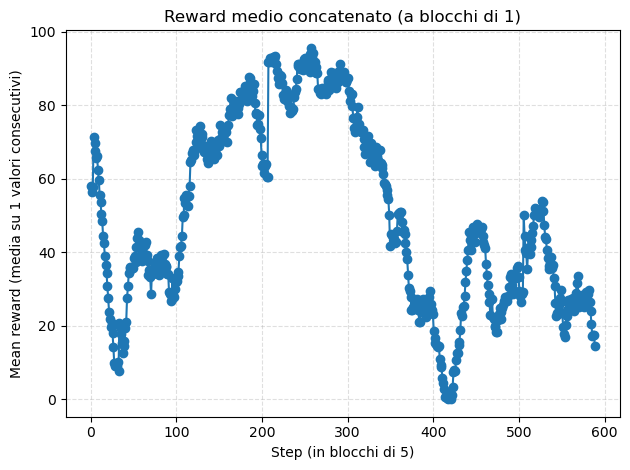

In [88]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

LOG_DIR = "train_results/log"
TARGET_COL = "rollout/ep_rew_mean"
BLOCK = 1  # dimensione blocco

def extract_datetime_from_name(path: str):
    """Estrae la data-ora dal nome della cartella tipo DDPG_20250911-081820"""
    folder = os.path.basename(path)
    match = re.search(r"(\d{8}-\d{6})", folder)
    if not match:
        return None
    return datetime.strptime(match.group(1), "%Y%m%d-%H%M%S")

# Trova tutti i progress.csv nelle sottocartelle
progress_files = glob.glob(os.path.join(LOG_DIR, "*/progress.csv"))

# Ordina per timestamp nel nome cartella
progress_files = sorted(
    progress_files, key=lambda f: extract_datetime_from_name(os.path.dirname(f))
)

dfs = []
for f in progress_files:
    try:
        df = pd.read_csv(f)
    except Exception as e:
        print(f"[SKIP] Errore leggendo {f}: {e}")
        continue

    if TARGET_COL not in df.columns:
        print(f"[SKIP] {f} non contiene {TARGET_COL}")
        continue

    dfs.append(df[[TARGET_COL]])

# Concatena tutti i run
all_df = pd.concat(dfs, ignore_index=True)

# Aggiungi indice progressivo
all_df["step"] = range(1, len(all_df) + 1)

# Raggruppa in blocchi di 5
all_df["block"] = (all_df.index // BLOCK) + 1
agg = all_df.groupby("block")[TARGET_COL].mean().reset_index()

# Asse x = centro del blocco
agg["step_center"] = agg["block"] * BLOCK - (BLOCK / 2)

# Plot
plt.figure()
plt.plot(agg["step_center"], agg[TARGET_COL], marker="o")
plt.xlabel("Step (in blocchi di 5)")
plt.ylabel(f"Mean reward (media su {BLOCK} valori consecutivi)")
plt.title(f"Reward medio concatenato (a blocchi di {BLOCK})")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()




[SKIP] Errore leggendo train_results/log/SAC_20250922-225714/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250922-225825/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250922-230550/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250922-230839/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-003652/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-013157/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-022917/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-120332/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-130934/progress.csv: No columns to parse from file
[SKIP] Errore leggendo train_results/log/SAC_20250923-1

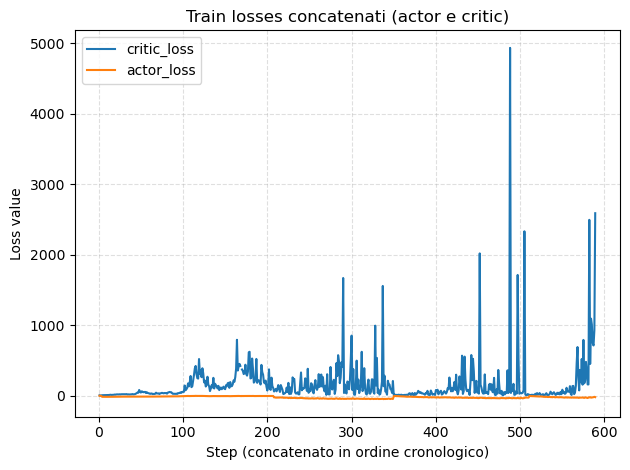

In [89]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

LOG_DIR = "train_results/log"
COLUMNS = ["train/critic_loss", "train/actor_loss"]

def extract_datetime_from_name(path: str):
    """Estrae la data-ora dal nome della cartella tipo DDPG_20250911-081820"""
    folder = os.path.basename(path)
    match = re.search(r"(\d{8}-\d{6})", folder)
    if not match:
        return None
    return datetime.strptime(match.group(1), "%Y%m%d-%H%M%S")

# Trova tutti i progress.csv nelle sottocartelle
progress_files = glob.glob(os.path.join(LOG_DIR, "*/progress.csv"))

# Ordina per timestamp nel nome cartella
progress_files = sorted(
    progress_files, key=lambda f: extract_datetime_from_name(os.path.dirname(f))
)

dfs = []
for f in progress_files:
    try:
        df = pd.read_csv(f)
    except Exception as e:
        print(f"[SKIP] Errore leggendo {f}: {e}")
        continue

    # tieni solo le colonne che ci interessano
    cols = [c for c in COLUMNS if c in df.columns]
    if not cols:
        print(f"[SKIP] {f} non contiene {COLUMNS}")
        continue

    dfs.append(df[cols])

# Concatena tutti i run
all_df = pd.concat(dfs, ignore_index=True)
all_df["step"] = range(1, len(all_df) + 1)

# Plot
plt.figure()
if "train/critic_loss" in all_df.columns:
    plt.plot(all_df["step"], all_df["train/critic_loss"], label="critic_loss")
if "train/actor_loss" in all_df.columns:
    plt.plot(all_df["step"], all_df["train/actor_loss"], label="actor_loss")

plt.xlabel("Step (concatenato in ordine cronologico)")
plt.ylabel("Loss value")
plt.title("Train losses concatenati (actor e critic)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_10394/2822549817.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_df = pd.concat(dfs, ignore_index=True)


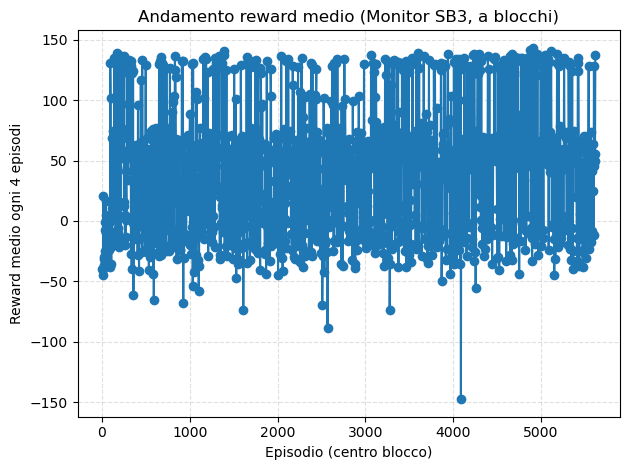

In [90]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
MONITOR_DIR = "train_results/monitor"
WINDOW_N = 4  # media mobile su N episodi

def load_all_monitor_csv(monitor_dir: str) -> pd.DataFrame:
    # Prende sia *.monitor.csv sia *.csv (per essere robusti)
    patterns = ["*.monitor.csv", "*.csv"]
    files = []
    for pat in patterns:
        files.extend(glob.glob(os.path.join(monitor_dir, pat)))

    if not files:
        raise FileNotFoundError(
            f"Nessun file monitor trovato in: {monitor_dir}. "
            "Controlla il percorso o i nomi dei file."
        )

    dfs = []
    for f in files:
        # I file Monitor di SB3 hanno una prima riga commentata con metadata
        # Usando comment='#' la saltiamo in modo robusto
        df = pd.read_csv(f, comment="#")
        # Ci aspettiamo almeno le colonne: r (reward), l (ep length), t (timesteps cumulativi)
        if not set(["r", "l", "t"]).issubset(df.columns):
            # In alcune versioni potrebbero esserci nomi leggermente diversi
            # Prova a normalizzare qui se serve
            raise ValueError(
                f"File {f} non ha le colonne attese (r, l, t). Colonne trovate: {list(df.columns)}"
            )
        df["__source__"] = os.path.basename(f)
        dfs.append(df)

    all_df = pd.concat(dfs, ignore_index=True)
    # Ordina per timesteps cumulativi per avere gli episodi in ordine temporale
    all_df = all_df.sort_values("t").reset_index(drop=True)
    # Aggiunge un contatore episodio globale (1..N)
    all_df["episode_idx"] = range(1, len(all_df) + 1)
    return all_df

def main():
    df = load_all_monitor_csv(MONITOR_DIR)

    # Indice di blocco: 0 per i primi N episodi, 1 per i successivi N, ecc.
    df["block"] = (df["episode_idx"] - 1) // WINDOW_N

    # Calcolo della media reward per blocco
    agg = df.groupby("block").agg(
        mean_reward=("r", "mean"),
        n=("r", "count")
    ).reset_index()

    # Centro del blocco sull'asse x (es. blocco 0 → episodio 5 se N=10)
    agg["episode_center"] = agg["block"] * WINDOW_N + (WINDOW_N / 2)

    # Plot
    plt.figure()
    plt.plot(agg["episode_center"], agg["mean_reward"], marker="o")
    plt.xlabel("Episodio (centro blocco)")
    plt.ylabel(f"Reward medio ogni {WINDOW_N} episodi")
    plt.title("Andamento reward medio (Monitor SB3, a blocchi)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [91]:
def analyze_sb3_monitor(file_path: str):
    """
    Analyze a Stable-Baselines3 monitor CSV log.
    
    Returns:
        dict with:
        - navigation time mean (only success episodes)
        - reward mean (only terminated episodes)
        - success rate, collision rate, timeout rate
    """
    # Skip JSON header
    df = pd.read_csv(file_path, skiprows=1)
    
    # Rename columns
    df = df.rename(columns={"r": "reward", "l": "length", "t": "t_start"})
    
    # Ensure proper types
    df["is_success"] = df["is_success"].astype(bool)
    df["terminated"] = df["terminated"].astype(bool)
    
    # Compute episode time = difference between consecutive t_start
    df["time"] = df["t_start"].diff().fillna(0)
    if len(df) > 1:
        df.loc[0, "time"] = df.loc[1, "t_start"] - df.loc[0, "t_start"]
    else:
        df.loc[0, "time"] = df.loc[0, "t_start"]
    
    # Timeout episodes: length == 250
    df["is_timeout"] = df["length"] == 250
    
    # Navigation time mean only for successful episodes
    nav_time_mean = df.loc[df["is_success"], "time"].mean()
    
    # Reward mean only for terminated episodes
    reward_mean = df.loc[df["terminated"], "reward"].mean()
    
    # Total episodes
    total_eps = len(df)
    
    # Success rate
    success_rate = df["is_success"].mean() * 100
    
    # Timeout rate
    timeout_rate = df["is_timeout"].mean() * 100
    
    # Collision = not success and not timeout
    collision_rate = ((~df["is_success"]) & (~df["is_timeout"])).mean() * 100
    
    return {
        "nav_time_mean_success": nav_time_mean,
        "reward_mean_terminated": reward_mean,
        "success_rate": success_rate,
        "collision_rate": collision_rate,
        "timeout_rate": timeout_rate,
    }




### AVOID SINGLE TABLE OBSTACLES WITH DEPTH CAM 

In [92]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_table_depth.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 30.70
reward_mean_terminated: 121.61
success_rate: 100.00
collision_rate: 0.00
timeout_rate: 0.00


### DDPG

In [93]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_depth_06.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 41.97
reward_mean_terminated: 120.11
success_rate: 82.00
collision_rate: 18.00
timeout_rate: 0.00


In [94]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_spatiotemporal_2dyn_1static_06.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 40.28
reward_mean_terminated: 125.83
success_rate: 80.00
collision_rate: 13.33
timeout_rate: 6.67


In [137]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_depth_08.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 39.91
reward_mean_terminated: 121.04
success_rate: 72.00
collision_rate: 28.00
timeout_rate: 0.00


In [96]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_depth_3.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 42.68
reward_mean_terminated: 119.54
success_rate: 76.00
collision_rate: 24.00
timeout_rate: 0.00


In [97]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_depth_4.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 43.43
reward_mean_terminated: 121.28
success_rate: 72.00
collision_rate: 28.00
timeout_rate: 0.00


### SAC

In [115]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_sac_15.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 34.10
reward_mean_terminated: 128.96
success_rate: 92.00
collision_rate: 8.00
timeout_rate: 0.00


In [113]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_sac_08.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 33.00
reward_mean_terminated: 134.20
success_rate: 90.00
collision_rate: 10.00
timeout_rate: 0.00


In [116]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_sac_3.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 35.45
reward_mean_terminated: 127.67
success_rate: 82.00
collision_rate: 18.00
timeout_rate: 0.00


In [117]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor_sac_4.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 40.63
reward_mean_terminated: 119.30
success_rate: 78.00
collision_rate: 22.00
timeout_rate: 0.00


### AVOID TABLE + DYN OBS 0.6m/s with depth

### DEPTH OBS SPEED 0.6 m/s

In [98]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 26.50
reward_mean_terminated: 131.29
success_rate: 46.00
collision_rate: 54.00
timeout_rate: 0.00


In [118]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")

nav_time_mean_success: 39.91
reward_mean_terminated: 121.04
success_rate: 72.00
collision_rate: 28.00
timeout_rate: 0.00


[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-003652/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-013157/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-022917/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-120332/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-130934/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-140701/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-144231/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-144246/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-154515/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-161918/progress.csv: 

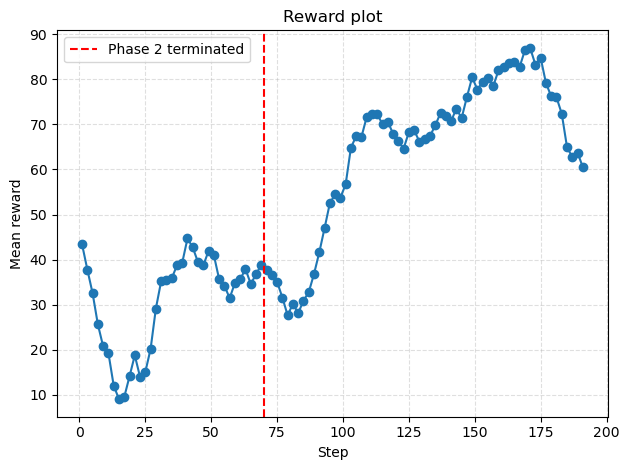

In [135]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

LOG_DIR = "reward_plot/SAC"
TARGET_COL = "rollout/ep_rew_mean"
BLOCK = 2  # dimensione blocco

def extract_datetime_from_name(path: str):
    """Estrae la data-ora dal nome della cartella tipo DDPG_20250911-081820"""
    folder = os.path.basename(path)
    match = re.search(r"(\d{8}-\d{6})", folder)
    if not match:
        return None
    return datetime.strptime(match.group(1), "%Y%m%d-%H%M%S")

# Trova tutti i progress.csv nelle sottocartelle
progress_files = glob.glob(os.path.join(LOG_DIR, "*/progress.csv"))

# Ordina per timestamp nel nome cartella
progress_files = sorted(
    progress_files, key=lambda f: extract_datetime_from_name(os.path.dirname(f))
)

dfs = []
for f in progress_files:
    try:
        df = pd.read_csv(f)
    except Exception as e:
        print(f"[SKIP] Errore leggendo {f}: {e}")
        continue

    if TARGET_COL not in df.columns:
        print(f"[SKIP] {f} non contiene {TARGET_COL}")
        continue

    dfs.append(df[[TARGET_COL]])

# Concatena tutti i run
all_df = pd.concat(dfs, ignore_index=True)

# Aggiungi indice progressivo
all_df["step"] = range(1, len(all_df) + 1)

# Raggruppa in blocchi di 5
all_df["block"] = (all_df.index // BLOCK) + 1
agg = all_df.groupby("block")[TARGET_COL].mean().reset_index()

# Asse x = centro del blocco
agg["step_center"] = agg["block"] * BLOCK - (BLOCK / 2)

# Plot
plt.figure()
plt.plot(agg["step_center"], agg[TARGET_COL], marker="o")
plt.xlabel("Step")
plt.ylabel(f"Mean reward")
plt.title(f"Reward plot")
plt.grid(True, linestyle="--", alpha=0.4)
x_pos = 70
plt.axvline(
    x=x_pos,
    color="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Phase 2 terminated"
)
plt.legend()

plt.tight_layout()
plt.show()

[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-003652/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-013157/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-022917/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-120332/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-130934/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-140701/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-144231/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-144246/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-154515/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/SAC/SAC_20250923-161918/progress.csv: 

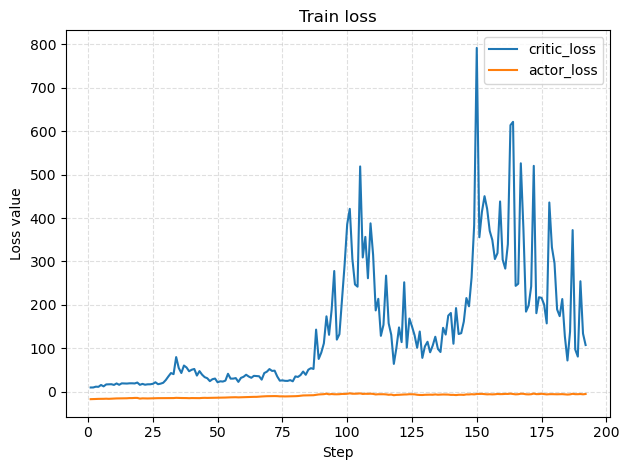

In [128]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

LOG_DIR = "reward_plot/SAC"
COLUMNS = ["train/critic_loss", "train/actor_loss"]

def extract_datetime_from_name(path: str):
    """Estrae la data-ora dal nome della cartella tipo DDPG_20250911-081820"""
    folder = os.path.basename(path)
    match = re.search(r"(\d{8}-\d{6})", folder)
    if not match:
        return None
    return datetime.strptime(match.group(1), "%Y%m%d-%H%M%S")

# Trova tutti i progress.csv nelle sottocartelle
progress_files = glob.glob(os.path.join(LOG_DIR, "*/progress.csv"))

# Ordina per timestamp nel nome cartella
progress_files = sorted(
    progress_files, key=lambda f: extract_datetime_from_name(os.path.dirname(f))
)

dfs = []
for f in progress_files:
    try:
        df = pd.read_csv(f)
    except Exception as e:
        print(f"[SKIP] Errore leggendo {f}: {e}")
        continue

    # tieni solo le colonne che ci interessano
    cols = [c for c in COLUMNS if c in df.columns]
    if not cols:
        print(f"[SKIP] {f} non contiene {COLUMNS}")
        continue

    dfs.append(df[cols])

# Concatena tutti i run
all_df = pd.concat(dfs, ignore_index=True)
all_df["step"] = range(1, len(all_df) + 1)

# Plot
plt.figure()
if "train/critic_loss" in all_df.columns:
    plt.plot(all_df["step"], all_df["train/critic_loss"], label="critic_loss")
if "train/actor_loss" in all_df.columns:
    plt.plot(all_df["step"], all_df["train/actor_loss"], label="actor_loss")

plt.xlabel("Step")
plt.ylabel("Loss value")
plt.title("Train loss")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-074325/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-083203/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-092543/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-101338/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-105852/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-184432/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-195033/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-205009/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-210951/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-2

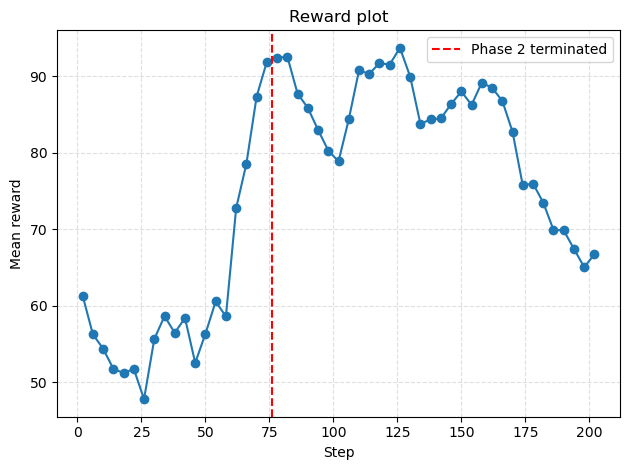

In [132]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

LOG_DIR = "reward_plot/DDPG"
TARGET_COL = "rollout/ep_rew_mean"
BLOCK = 4  # dimensione blocco

def extract_datetime_from_name(path: str):
    """Estrae la data-ora dal nome della cartella tipo DDPG_20250911-081820"""
    folder = os.path.basename(path)
    match = re.search(r"(\d{8}-\d{6})", folder)
    if not match:
        return None
    return datetime.strptime(match.group(1), "%Y%m%d-%H%M%S")

# Trova tutti i progress.csv nelle sottocartelle
progress_files = glob.glob(os.path.join(LOG_DIR, "*/progress.csv"))

# Ordina per timestamp nel nome cartella
progress_files = sorted(
    progress_files, key=lambda f: extract_datetime_from_name(os.path.dirname(f))
)

dfs = []
for f in progress_files:
    try:
        df = pd.read_csv(f)
    except Exception as e:
        print(f"[SKIP] Errore leggendo {f}: {e}")
        continue

    if TARGET_COL not in df.columns:
        print(f"[SKIP] {f} non contiene {TARGET_COL}")
        continue

    dfs.append(df[[TARGET_COL]])

# Concatena tutti i run
all_df = pd.concat(dfs, ignore_index=True)

# Aggiungi indice progressivo
all_df["step"] = range(1, len(all_df) + 1)

# Raggruppa in blocchi di 5
all_df["block"] = (all_df.index // BLOCK) + 1
agg = all_df.groupby("block")[TARGET_COL].mean().reset_index()

# Asse x = centro del blocco
agg["step_center"] = agg["block"] * BLOCK - (BLOCK / 2)

# Plot
plt.figure()
plt.plot(agg["step_center"], agg[TARGET_COL], marker="o")
plt.xlabel("Step")
plt.ylabel(f"Mean reward")
plt.title(f"Reward plot")
plt.grid(True, linestyle="--", alpha=0.4)

x_pos = 76
plt.axvline(
    x=x_pos,
    color="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Phase 2 terminated"
)
plt.legend()

plt.tight_layout()
plt.show()

[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-074325/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-083203/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-092543/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-101338/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250919-105852/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-184432/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-195033/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-205009/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-210951/progress.csv: No columns to parse from file
[SKIP] Errore leggendo reward_plot/DDPG/DDPG_20250923-2

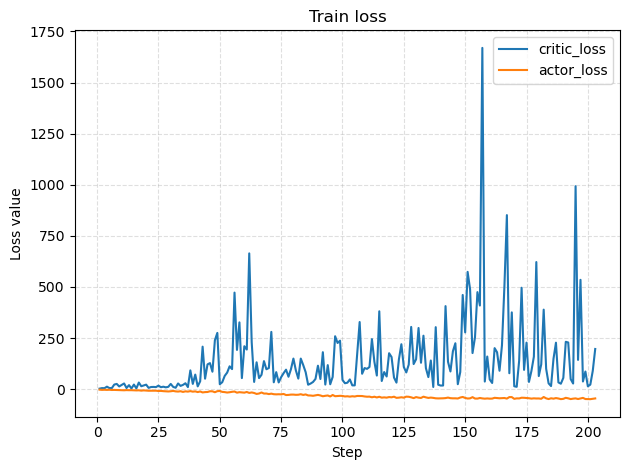

In [129]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

LOG_DIR = "reward_plot/DDPG"
COLUMNS = ["train/critic_loss", "train/actor_loss"]

def extract_datetime_from_name(path: str):
    """Estrae la data-ora dal nome della cartella tipo DDPG_20250911-081820"""
    folder = os.path.basename(path)
    match = re.search(r"(\d{8}-\d{6})", folder)
    if not match:
        return None
    return datetime.strptime(match.group(1), "%Y%m%d-%H%M%S")

# Trova tutti i progress.csv nelle sottocartelle
progress_files = glob.glob(os.path.join(LOG_DIR, "*/progress.csv"))

# Ordina per timestamp nel nome cartella
progress_files = sorted(
    progress_files, key=lambda f: extract_datetime_from_name(os.path.dirname(f))
)

dfs = []
for f in progress_files:
    try:
        df = pd.read_csv(f)
    except Exception as e:
        print(f"[SKIP] Errore leggendo {f}: {e}")
        continue

    # tieni solo le colonne che ci interessano
    cols = [c for c in COLUMNS if c in df.columns]
    if not cols:
        print(f"[SKIP] {f} non contiene {COLUMNS}")
        continue

    dfs.append(df[cols])

# Concatena tutti i run
all_df = pd.concat(dfs, ignore_index=True)
all_df["step"] = range(1, len(all_df) + 1)

# Plot
plt.figure()
if "train/critic_loss" in all_df.columns:
    plt.plot(all_df["step"], all_df["train/critic_loss"], label="critic_loss")
if "train/actor_loss" in all_df.columns:
    plt.plot(all_df["step"], all_df["train/actor_loss"], label="actor_loss")

plt.xlabel("Step")
plt.ylabel("Loss value")
plt.title("Train loss")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
def calculate_velocity_distribution(filename):
    bins = [
        (0.0, 0.1, True),
        (0.1, 0.2, False),
        (0.2, 0.3, False),
        (0.3, 0.4, False),
        (0.4, 0.5, False),
        (0.5, 0.6, False)
    ]
    
    counts = [0] * len(bins)
    total = 0

    with open(filename, 'r') as file:
        for line in file:
            try:
                v = float(line.strip())
                total += 1
                for i, (low, high, closed_low) in enumerate(bins):
                    if closed_low:
                        if low <= v <= high:
                            counts[i] += 1
                            break
                    else:
                        if low < v <= high:
                            counts[i] += 1
                            break
            except ValueError:
                continue

    percentages = [(c / total * 100) if total > 0 else 0 for c in counts]

    labels = [f"[{low}, {high}]" if closed_low else f"({low}, {high}]"
              for (low, high, closed_low) in bins]

    return labels, percentages


In [105]:
def calculate_angular_velocity_distribution(filename):
    bins = []
    start, end, step = -0.5, 0.5, 0.1
    current = start
    first = True
    while current < end:
        low = round(current, 1)
        high = round(current + step, 1)
        bins.append((low, high, first))
        first = False
        current += step

    counts = [0] * len(bins)
    total = 0

    with open(filename, 'r') as file:
        for line in file:
            try:
                v = float(line.strip())
                total += 1
                for i, (low, high, closed_low) in enumerate(bins):
                    if closed_low:
                        if low <= v <= high:
                            counts[i] += 1
                            break
                    else:
                        if low < v <= high:
                            counts[i] += 1
                            break
            except ValueError:
                continue

    percentages = [(c / total * 100) if total > 0 else 0 for c in counts]

    labels = [f"[{low}, {high}]" if closed_low else f"({low}, {high}]"
              for (low, high, closed_low) in bins]

    return labels, percentages


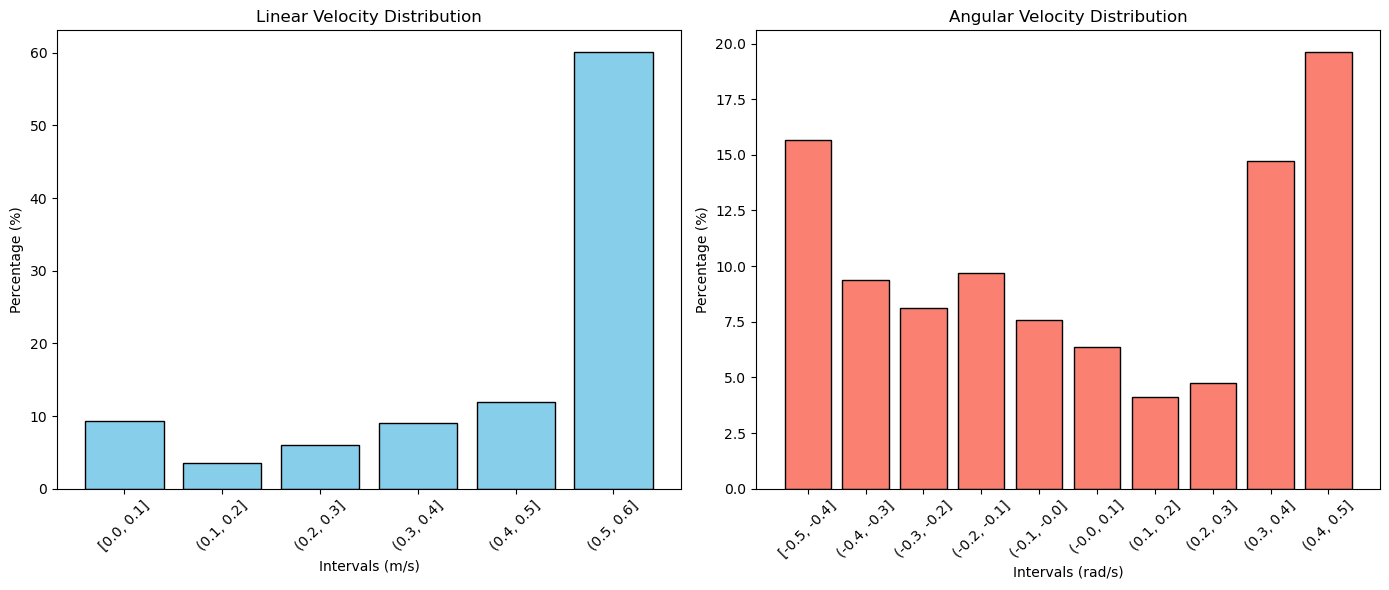

In [106]:
import matplotlib.pyplot as plt

# Calcola le distribuzioni dai file
linear_labels, linear_percentages = calculate_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/linear_velocity_sac.txt")
angular_labels, angular_percentages = calculate_angular_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/angular_velocity_sac.txt")

# Crea i plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear velocity
axes[0].bar(linear_labels, linear_percentages, color="skyblue", edgecolor="black")
axes[0].set_title("Linear Velocity Distribution")
axes[0].set_xlabel("Intervals (m/s)")
axes[0].set_ylabel("Percentage (%)")
axes[0].tick_params(axis='x', rotation=45)

# Angular velocity
axes[1].bar(angular_labels, angular_percentages, color="salmon", edgecolor="black")
axes[1].set_title("Angular Velocity Distribution")
axes[1].set_xlabel("Intervals (rad/s)")
axes[1].set_ylabel("Percentage (%)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

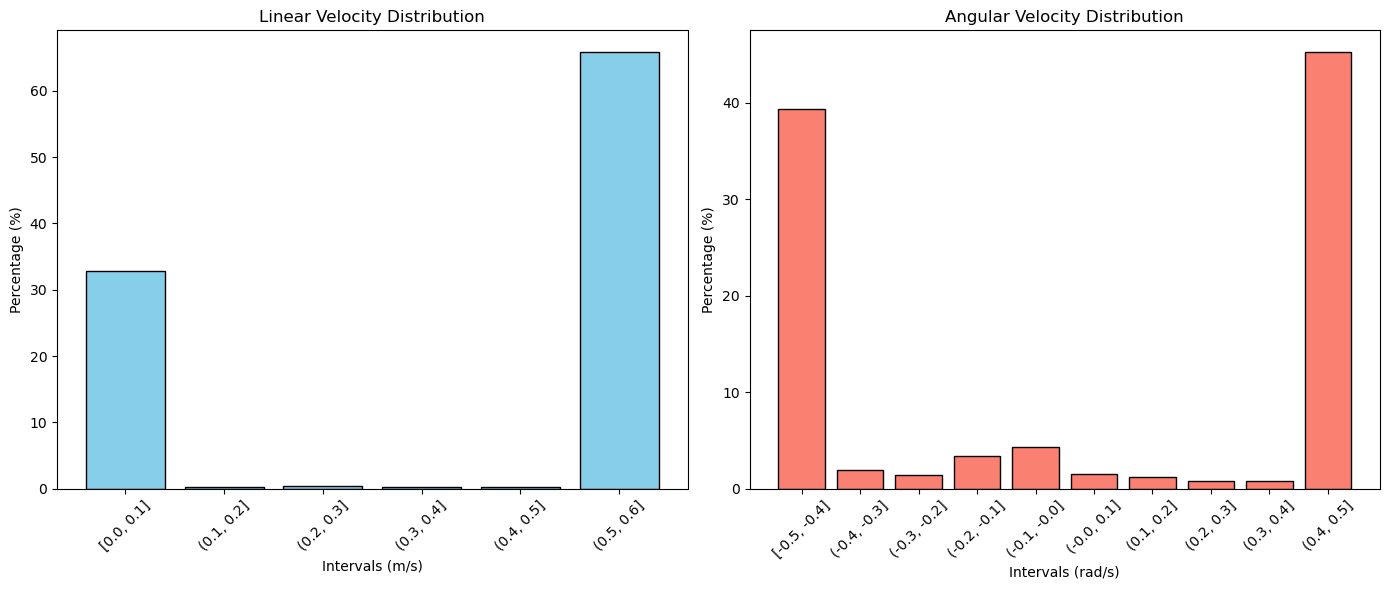

In [107]:
import matplotlib.pyplot as plt

# Calcola le distribuzioni dai file
linear_labels, linear_percentages = calculate_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/linear_velocity.txt")
angular_labels, angular_percentages = calculate_angular_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/angular_velocity.txt")

# Crea i plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear velocity
axes[0].bar(linear_labels, linear_percentages, color="skyblue", edgecolor="black")
axes[0].set_title("Linear Velocity Distribution")
axes[0].set_xlabel("Intervals (m/s)")
axes[0].set_ylabel("Percentage (%)")
axes[0].tick_params(axis='x', rotation=45)

# Angular velocity
axes[1].bar(angular_labels, angular_percentages, color="salmon", edgecolor="black")
axes[1].set_title("Angular Velocity Distribution")
axes[1].set_xlabel("Intervals (rad/s)")
axes[1].set_ylabel("Percentage (%)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [108]:
calculate_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/linear_velocity_sac.txt")

(['[0.0, 0.1]',
  '(0.1, 0.2]',
  '(0.2, 0.3]',
  '(0.3, 0.4]',
  '(0.4, 0.5]',
  '(0.5, 0.6]'],
 [9.37984496124031,
  3.565891472868217,
  5.9689922480620154,
  9.069767441860465,
  11.937984496124031,
  60.07751937984496])

In [109]:
calculate_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/linear_velocity.txt")

(['[0.0, 0.1]',
  '(0.1, 0.2]',
  '(0.2, 0.3]',
  '(0.3, 0.4]',
  '(0.4, 0.5]',
  '(0.5, 0.6]'],
 [32.79115159401431,
  0.2602472348731295,
  0.4554326610279766,
  0.32530904359141183,
  0.32530904359141183,
  65.84255042290175])

In [110]:
"""def calculate_angular_velocity_distribution(filename):
    # Define angular velocity bins (intervals)
    bins = []
    start, end, step = -0.5, 0.5, 0.1
    current = start
    first = True
    while current < end:
        low = round(current, 1)
        high = round(current + step, 1)
        bins.append((low, high, first))  # first bin closed [low, high]
        first = False
        current += step

    # Initialize counts
    counts = [0] * len(bins)
    total = 0

    # Read angular velocities from file
    with open(filename, 'r') as file:
        for line in file:
            try:
                v = float(line.strip())
                total += 1
                for i, (low, high, closed_low) in enumerate(bins):
                    if closed_low:  # first bin [low, high]
                        if low <= v <= high:
                            counts[i] += 1
                            break
                    else:  # (low, high]
                        if low < v <= high:
                            counts[i] += 1
                            break
            except ValueError:
                continue  # skip invalid lines

    # Calculate percentages
    percentages = [(c / total * 100) if total > 0 else 0 for c in counts]

    # Print results
    for i, (low, high, closed_low) in enumerate(bins):
        if closed_low:
            label = f"[{low}, {high}]"
        else:
            label = f"({low}, {high}]"
        print(f"Range {label}: {percentages[i]:.2f}%")"""

'def calculate_angular_velocity_distribution(filename):\n    # Define angular velocity bins (intervals)\n    bins = []\n    start, end, step = -0.5, 0.5, 0.1\n    current = start\n    first = True\n    while current < end:\n        low = round(current, 1)\n        high = round(current + step, 1)\n        bins.append((low, high, first))  # first bin closed [low, high]\n        first = False\n        current += step\n\n    # Initialize counts\n    counts = [0] * len(bins)\n    total = 0\n\n    # Read angular velocities from file\n    with open(filename, \'r\') as file:\n        for line in file:\n            try:\n                v = float(line.strip())\n                total += 1\n                for i, (low, high, closed_low) in enumerate(bins):\n                    if closed_low:  # first bin [low, high]\n                        if low <= v <= high:\n                            counts[i] += 1\n                            break\n                    else:  # (low, high]\n               

In [111]:
calculate_angular_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/angular_velocity_sac.txt")

(['[-0.5, -0.4]',
  '(-0.4, -0.3]',
  '(-0.3, -0.2]',
  '(-0.2, -0.1]',
  '(-0.1, -0.0]',
  '(-0.0, 0.1]',
  '(0.1, 0.2]',
  '(0.2, 0.3]',
  '(0.3, 0.4]',
  '(0.4, 0.5]'],
 [15.658914728682172,
  9.37984496124031,
  8.13953488372093,
  9.689922480620156,
  7.596899224806202,
  6.3565891472868215,
  4.108527131782946,
  4.728682170542635,
  14.728682170542637,
  19.612403100775193])

In [112]:
calculate_angular_velocity_distribution("/home/violo/tesi_project/src/tiago_navigation/data/angular_velocity.txt")

(['[-0.5, -0.4]',
  '(-0.4, -0.3]',
  '(-0.3, -0.2]',
  '(-0.2, -0.1]',
  '(-0.1, -0.0]',
  '(-0.0, 0.1]',
  '(0.1, 0.2]',
  '(0.2, 0.3]',
  '(0.3, 0.4]',
  '(0.4, 0.5]'],
 [39.36239427456083,
  1.951854261548471,
  1.3662979830839297,
  3.383214053350683,
  4.294079375406636,
  1.4964216005204944,
  1.236174365647365,
  0.8458035133376708,
  0.8458035133376708,
  45.21795705920625])

In [ ]:
results = analyze_sb3_monitor("test_results/eval_monitor/monitor.csv")
for k, v in results.items():
    print(f"{k}: {v:.2f}")